## Библиотеки, параметры, константы задачи

In [1]:
from applications.poly_features_environment import PolyFeaturesEnv
import torch
import models
import numpy as np
from common.fstream import read_tensor, read_matrix, rescale_array, read_mc_tensor

PATH_BASE = "/home/amedvedev/projects/python/DenoisingCNN"
NAME_DATASET = "gcg19"
env = PolyFeaturesEnv(name_model="J_matrix_denoiser_30pct_v_2", name_dataset=NAME_DATASET, path_base=PATH_BASE,
                      device_name="cuda")


## Загрузка данных

In [2]:
import torchvision

transforms = torchvision.transforms.Compose([
        torchvision.transforms.CenterCrop(64),
        torchvision.transforms.Normalize(0.5, 0.5)
    ])

env.clear_features_and_targets()
env \
    .set_batch_size(
        train_batch_size=4, val_batch_size=4
    ) \
    .load_feature(
        shape=(1, 64, 64), feature_name="Uvych2_noised_re.xls", mapper=read_matrix, transform=transforms, lazy_load=True
    ) \
    .set_target(
        shape=(1, 64, 64), target_name="Uvych2_re.xls", mapper=read_matrix, transform=transforms, lazy_load=True
    ) \

print(env.train_count, env.val_count)

223 16


In [2]:
env.clear_features_and_targets()
env \
    .set_batch_size(
        train_batch_size=32, val_batch_size=8
    ) \
    .load_feature(
        shape=(1, 80, 80), feature_name="J_noised_re.xls", mapper=read_tensor, transform=None
    ) \
    .set_target(
        shape=(1, 80, 80), target_name="J_re.xls", mapper=lambda path: read_tensor(path), transform=None
    ) \

print(env.train_count, env.val_count)

27 8 loading progress: |███████████████████████████████████████████-------| 87.5% Complete | 


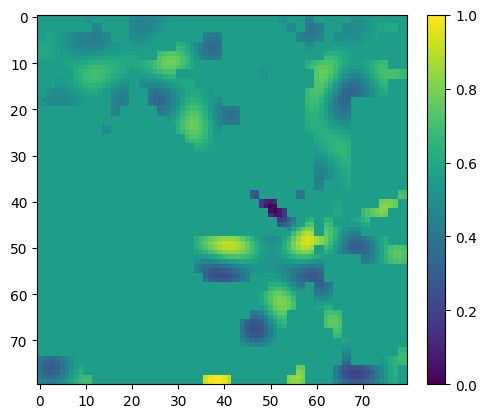

In [3]:
import matplotlib.pyplot as plt
im = plt.imshow(env.train_target_loader[0][2][0].cpu().detach().numpy())
plt.colorbar(im, orientation='vertical', fraction=0.046, pad=0.04)


## Модели

### Новая локальная модель

In [29]:
env.set_name_model("uvych_matrix_noise_predictor_2")

In [5]:
env.model = models.autoencoders.UnetAutoencoder.UNetAuto(num_channels=1, num_out_channels=1).to(env.device)

In [26]:
env.model = models.autoencoders.unet.UNet(in_channels=1, out_channels=1, init_features=64).to(env.device)


In [3]:
env.model = models.autoencoders.res_unet.ResUnetPlusPlus(channel=1).to(env.device)

In [14]:
env.model = models.autoencoders.purecnns.ConvAutoencoderLumaRelu(in_channels=1, out_channels=1).to(env.device)


In [3]:
env.model = models.autoencoders.residual.AEv5_0(in_channels=1, out_channels=1).to(env.device)
# fm_path="/home/amedvedev/projects/python/DenoisingCNN/assets/pt/uvych_matrix_denoiser_10 (4th copy).pt"
from torch import nn


In [12]:
from torch import nn
def weights_init(m):
    if isinstance(m, nn.Conv2d):
        nn.init.xavier_normal_(m.weight.data)
    elif isinstance(m, nn.ConvTranspose2d):
        nn.init.xavier_normal_(m.weight.data)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data)
        # nn.init.normal_(m.bias.data)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.normal_(m.weight.data, mean=1, std=0.02)
        nn.init.constant_(m.bias.data, 0)

env.model.apply(weights_init)

ConvAutoencoderLumaRelu(
  (all_layers): Sequential(
    (0): Conv2d(1, 76, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(76, 38, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(38, 38, kernel_size=(2, 2), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=1, padding=1, dilation=1, ceil_mode=False)
    (9): ConvTranspose2d(38, 38, kernel_size=(2, 2), stride=(1, 1))
    (10): ReLU()
    (11): ConvTranspose2d(38, 76, kernel_size=(2, 2), stride=(1, 1))
    (12): ReLU()
    (13): ConvTranspose2d(76, 1, kernel_size=(2, 2), stride=(1, 1))
    (14): ReLU()
  )
)

In [22]:
env.model = models.autoencoders.swin_unet.SwinTransformerSys(64, in_chans=1, num_classes=1, window_size=4).to(env.device)


SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.1;num_classes:1
---final upsample expand_first---


In [4]:
env.model

AEv4_0(
  (first): AEv2_0(
    (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_transpose0): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_transpose1): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_transpose2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_transpose3): ConvTranspose2d(64, 64, k

### Импорт претренерованной модели

In [3]:
env.load_model(model_type="pt")

## Визуализация батча валидационного датасета

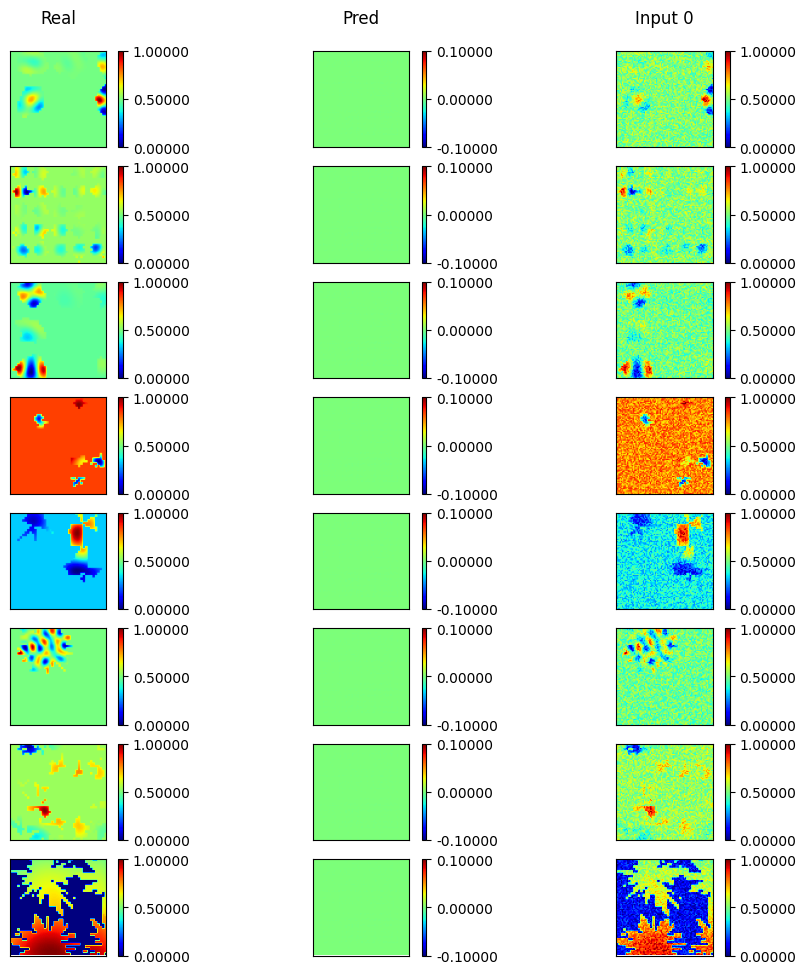

In [15]:
env.plot_batch_with_inputs(concrete=0, figsize=(10, 10), format="%.5f", wspace=0.0, hspace=0.2)


/home/amedvedev/projects/python/DenoisingCNN/venv/lib/python3.10/site-packages/torch/_tensor.py:868: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


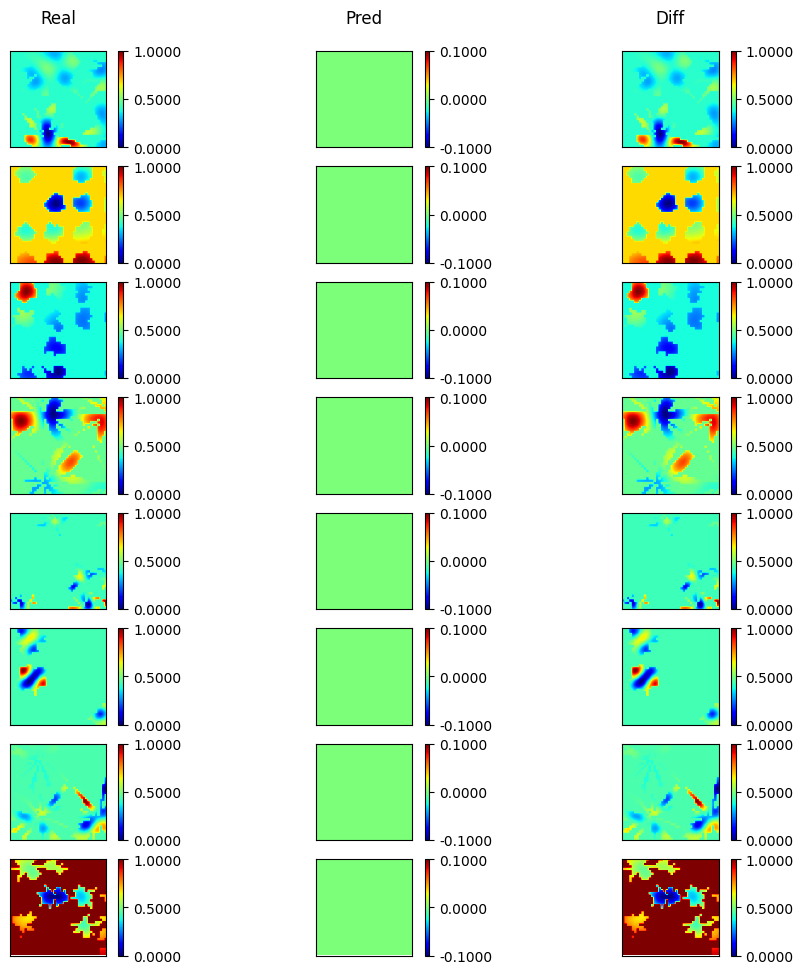

In [8]:
env.plot_batch(concrete=6, figsize=(10, 10), format="%.4f", wspace=0.0, hspace=0.2)


In [13]:
env.model

AEv6_0(
  (conv0): Conv2d(1, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv1): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv_transpose0): ConvTranspose2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv_transpose1): ConvTranspose2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv_transpose2): ConvTranspose2d(100, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv_transpose3): ConvTranspose2d(100, 100, kernel_size=(2, 2), s

## Численные значения отклонений

In [7]:
def test():
    losses = []
    errors = []
    init_errors = []
    losses_dataset = []
    with torch.no_grad():
    
        for row in zip(*env.val_features_loaders + [env.val_target_loader]):
            data_features = list(row)
            data_target = data_features.pop()
            outputs = env.model(*data_features) #* 65.
            
            for ex_id in range(env.val_batch_size):
                
                losses_dataset_step = torch.max(torch.abs(data_features[0][ex_id][0] - data_target[ex_id])).detach().tolist()
                losses_dataset.append(losses_dataset_step)
                
                init_error = torch.mean(torch.abs(data_features[0][ex_id][0] - data_target[ex_id]) / torch.abs(data_target[ex_id]))
                init_errors.append(init_error.detach().tolist())
                
                loss = torch.max(torch.abs(outputs[ex_id] - data_target[ex_id]))
                losses.append(loss.detach().tolist())
                # print(data_target[ex_id].size())
                
                
                error = torch.mean(torch.abs(outputs[ex_id] - data_target[ex_id]) / torch.abs(data_target[ex_id]))
                errors.append(error.detach().tolist())
                #print(outputs, data_target)
                
    print("Начальное среднее отклонение по значениям:", sum(losses_dataset) / len(losses_dataset))
    print("Текущее среднее отклонение по значениям:", sum(losses) / len(losses))
    
    print()
    print("Начальное максимальное отклонение по значениям:", max(losses_dataset))
    print("Текущее максимальное отклонение по значениям в векторе:", max(losses))
    
    print()
    print("Начальная средняя относительная ошибка:", sum(init_errors) / len(init_errors))
    print("Текущая средняя относительная ошибка:", sum(errors) / len(errors))
    print()
    print("Начальная максимальная относительная ошибка:", max(init_errors))
    print("Текущая максимальная относительная ошибка:", max(errors))
test()

Начальное среднее отклонение по значениям: 0.21272827382199466
Текущее среднее отклонение по значениям: 1.0

Начальное максимальное отклонение по значениям: 0.2346821427345276
Текущее максимальное отклонение по значениям в векторе: 1.0

Начальная средняя относительная ошибка: nan
Текущая средняя относительная ошибка: nan

Начальная максимальная относительная ошибка: inf
Текущая максимальная относительная ошибка: nan


## Training

In [18]:
from common.losses import MseCoeffLoss, L1CoeffLoss
from pytorch_msssim import MS_SSIM as _MS_SSIM


In [24]:
env.set_name_model("uvych_tensor_denoiser_2")

In [13]:
opt = torch.optim.AdamW(env.model.parameters(), lr=0.01)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[int(10 * 0.6), int(10 * 0.9)], gamma=0.1)

In [16]:
class L1_MSSSIM(torch.nn.Module):
    def __init__(self):
        super(L1_MSSSIM, self).__init__()
        self.l1 = nn.L1Loss()
        self.ms_ssim = _MS_SSIM(data_range=4, size_average=True, win_size=1, channel=1)

    def forward(self, x, y):
        ms_ssim_loss = 1 - self.ms_ssim(x, y)
        l1_loss = self.l1(x, y)

        return l1_loss + ms_ssim_loss

In [12]:
from torch import nn

In [22]:
env.train(5, step_saving=True, step_plotting=False,
          optimizer=opt, scheduler=None, 
          criterion=L1_MSSSIM().to(env.device), 
          callbacks=[lambda: scheduler.step()]) #


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 1 	Training Loss: 0.003264773 	Validating Loss: 0.003573360 	Time: 2.09 m

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 2 	Training Loss: 0.003263244 	Validating Loss: 0.003578866 	Time: 2.10 m

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 3 	Training Loss: 0.003261630 	Validating Loss: 0.003583670 	Time: 2.10 m

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 4 	

In [5]:
opt = torch.optim.Adam(env.model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=4)
# scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)



In [6]:
env.train(10, step_saving=True, step_plotting=False,
          optimizer=opt, scheduler=None, 
          criterion=torch.nn.MSELoss(), 
          callbacks=[lambda: scheduler.step(env.test_losses[-1])]) #lambda: scheduler.step(env.test_losses[-1])

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 1 	Training Loss: 0.282995882 	Validating Loss: 0.261728641 	Time: 0.17 m

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 2 	Training Loss: 0.282995882 	Validating Loss: 0.261728641 	Time: 0.17 m



KeyboardInterrupt: 

## Сохранение модели

In [22]:
env.save(onnx=False)

AttributeError: 'PolyFeaturesEnv' object has no attribute 'width'

In [ ]:
from applications import model_manager
path_save_model_onnx = env.path_save_model("onnx")
inp = torch.randn((1, 1, 80, 80), device=env.device)
model_manager.save_onnx_model(env.model, path_save_model_onnx, inp)

## Loss visualisation

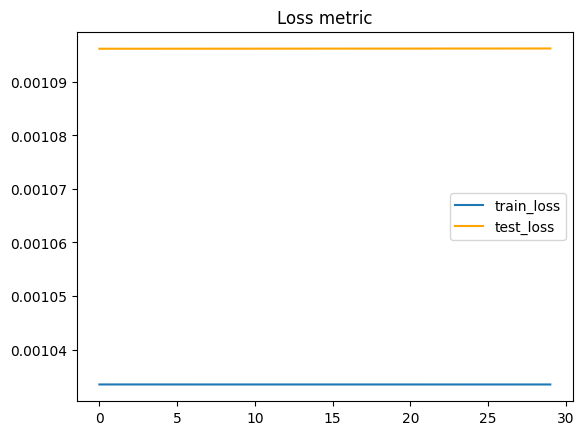

In [21]:
env.show_metrics(n_last=30, train=True, val=True)

## Clear memory

In [22]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [18]:
env.model.cpu()
del env.model
import torch
torch.cuda.empty_cache()

AttributeError: 'PolyFeaturesEnv' object has no attribute 'model'